In [172]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Load the dataset
data = pd.read_excel('PSP_Jan_Feb_2019.xlsx')
data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


### Data exploration

In [175]:
# Find number of rows and column in the dataframe
data.shape

(50410, 8)

In [176]:
# Information about the data frame, including columns, null counts, data types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [177]:
# Check for missing values
data.isnull().sum()

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [178]:
# Check data formats
data.dtypes

Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object

In [179]:
# Deleting Unnamed column
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [180]:
# Descriptive statistics
data.describe()

,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000
mean,202.395715,0.202896,0.238266
std,96.274730,0.402160,0.426027
min,6.000000,0.000000,0.000000
25%,133.000000,0.000000,0.000000
50%,201.000000,0.000000,0.000000
75%,269.000000,0.000000,0.000000
max,630.000000,1.000000,1.000000


In [181]:
data.shape

(50410, 7)

In [182]:
# Find unique values in each column in the dataframe
for column in data.columns:
     unique_values = data[column].unique()
     print(f"Column name: {column}\n Unique Values: {unique_values}\n")

Column name: tmsp
 Unique Values: ['2019-01-01T00:01:11.000000000' '2019-01-01T00:01:17.000000000'
 '2019-01-01T00:02:49.000000000' ... '2019-02-28T23:47:04.000000000'
 '2019-02-28T23:47:36.000000000' '2019-02-28T23:48:19.000000000']

Column name: country
 Unique Values: ['Germany' 'Austria' 'Switzerland']

Column name: amount
 Unique Values: [ 89 238 124 282 117 174 232 268 205 111 277 137 148 394  84  34 324 251
 100 221 340 257 193  36 146 192  14 175 270 256 310 239  37  56 105 228
 322 367 190 186 121 274 264 132 279 104 184 258 209 260 383 109 161 127
 233 129 243 131 225 246 126  82 329 335 173 222 181  85  62 291 107  78
  22 164 203 113 379 224 242  45 158 140  13 197 215 151 208 116 263 136
 211 180 125 247 376 162 355 135 188  38 144  23 202 212 273 230 141 293
 336 163 350 374 176 218  53 267 255 216 450 301 271 183 198  19 214 147
 368 249  72 315 199 142 262  65  44 169 269 201 118 229 240 339 154 156
  86 250 390 297 308 223 191 170 488 304 219 444 189 317 200 172 206  6

### Univariate analysis

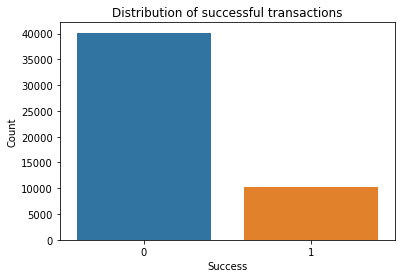

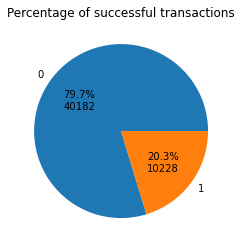

In [183]:
# Distribution of the target variable
sns.countplot(x='success', data=data)
plt.title('Distribution of successful transactions')
plt.xlabel('Success')
plt.ylabel('Count')
plt.show()

total = data['success'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(data['success'].value_counts().values, labels=data['success'].value_counts().index, autopct=fmt)
plt.title('Percentage of successful transactions')
plt.show()

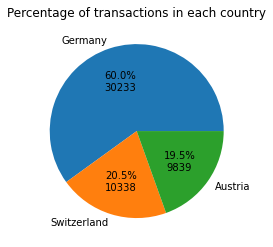

In [184]:
# Distribution of the country variable
# data['country'].value_counts()
total = data['country'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(data['country'].value_counts().values, labels=data['country'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions in each country')
plt.show()

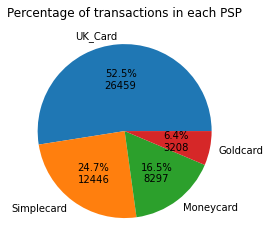

In [185]:
# Distribution of the PSP variable
# data['PSP'].value_counts()
total = data['PSP'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(data['PSP'].value_counts().values, labels=data['PSP'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions in each PSP')
plt.show()

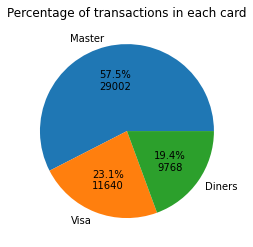

In [186]:
# Distribution of the card variable
# data['card'].value_counts()
total = data['card'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(data['card'].value_counts().values, labels=data['card'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions in each card')
plt.show()

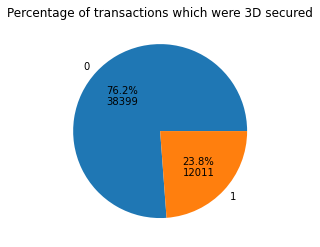

In [187]:
# Distribution of the 3D_secured variable
# data['3D_secured'].value_counts()
total = data['3D_secured'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(data['3D_secured'].value_counts().values, labels=data['3D_secured'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions which were 3D secured')
plt.show()

In [188]:
# summary statistics of transaction amount
data.amount.describe()

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64

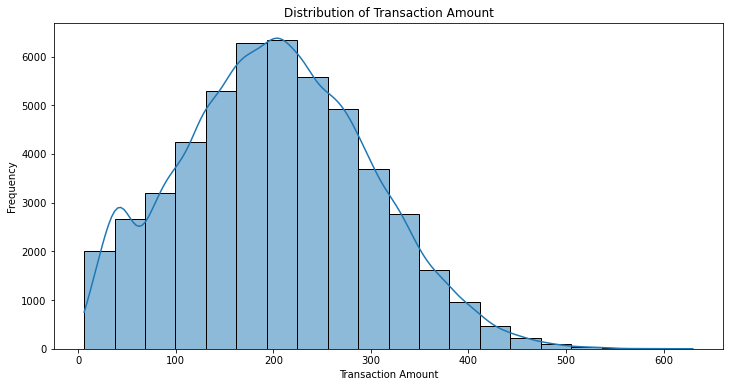

In [189]:
# Transaction amount distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['amount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

- The distribution is right-skewed, indicating a higher occurrence of lower transaction amounts and fewer high-value transactions.
- The long tail towards the right suggests that while less common, there are transactions with significantly higher amounts, which could be outliers.


In [190]:
# Timestamp column
print("Time range of the transactions is between {} and {}".format(data.tmsp.min(), data.tmsp.max()))

Time range of the transactions is between 2019-01-01 00:01:11 and 2019-02-28 23:48:19


### Bivariate analysis

In [191]:
data.columns

Index(['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card'], dtype='object')

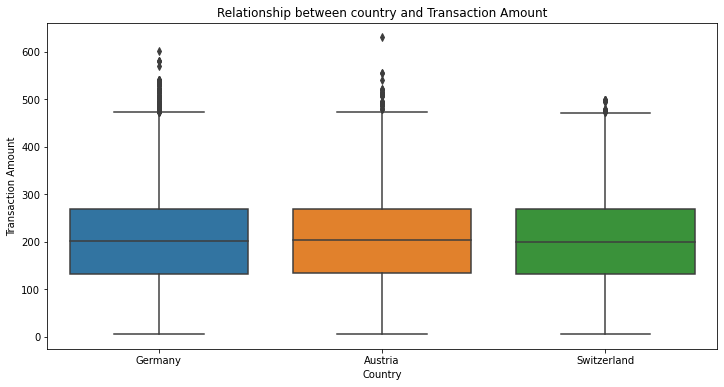

In [192]:
# Relationship between country and transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='amount', data=data)
plt.title('Relationship between country and Transaction Amount')
plt.xlabel('Country')
plt.ylabel('Transaction Amount')
plt.show()

- Austria shows the highest variability and potential for extreme transaction values, as indicated by the spread and outliers.
- Switzerland's transaction amounts are similar to Austria's in terms of median values but with slightly fewer extreme outliers

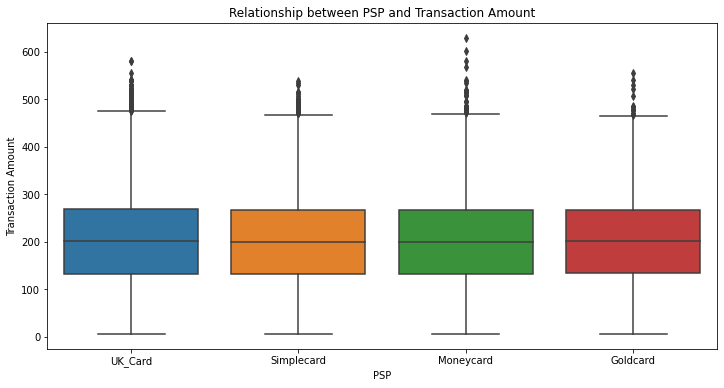

In [193]:
# Relationship between PSP and transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='PSP', y='amount', data=data)
plt.title('Relationship between PSP and Transaction Amount')
plt.xlabel('PSP')
plt.ylabel('Transaction Amount')
plt.show()

- Outliers are present for all PSPs, with Moneycard showing the highest transaction amount outliers, potentially indicating occasional large transactions processed through this provider.

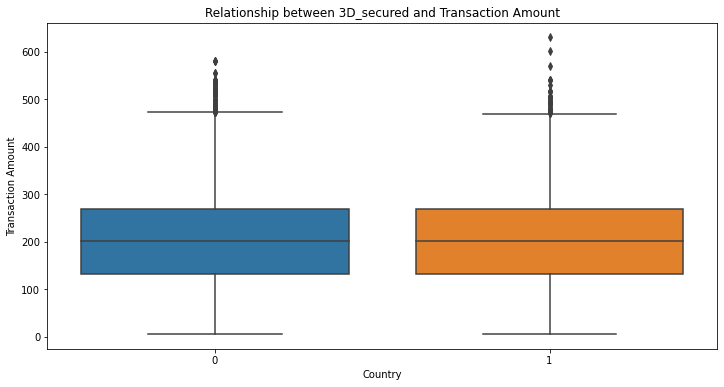

In [194]:
# Relationship between 3D_secured and transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='3D_secured', y='amount', data=data)
plt.title('Relationship between 3D_secured and Transaction Amount')
plt.xlabel('Country')
plt.ylabel('Transaction Amount')
plt.show()

- Transactions that are not 3D secured exhibit a more compact interquartile range, suggesting less variability in transaction amounts compared to the 3D secured ones.

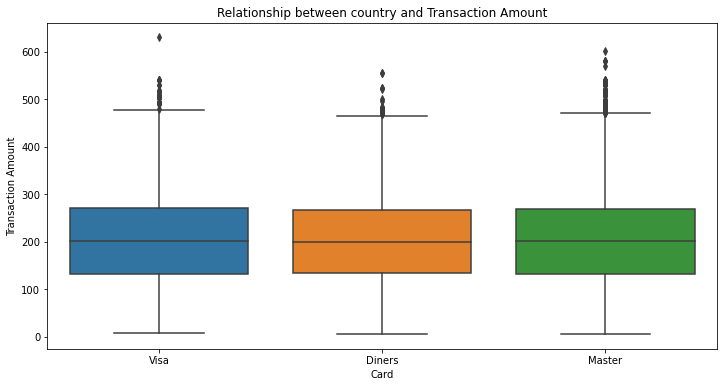

In [195]:
# Relationship between card and transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='card', y='amount', data=data)
plt.title('Relationship between country and Transaction Amount')
plt.xlabel('Card')
plt.ylabel('Transaction Amount')
plt.show()

- Each card type has outliers, with Visa showing the highest transaction amount outlier

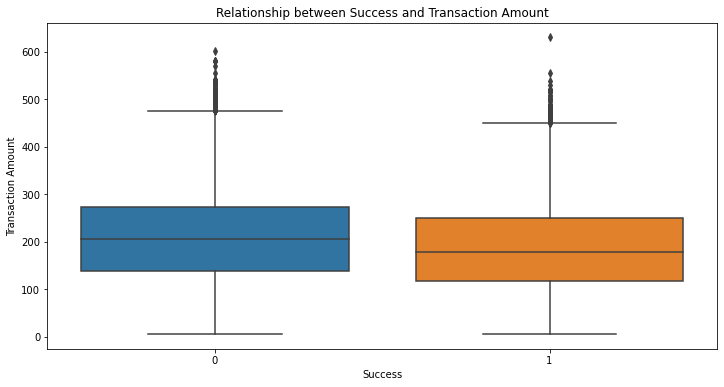

In [196]:
# Relationship between success and transaction amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='success', y='amount', data=data)
plt.title('Relationship between Success and Transaction Amount')
plt.xlabel('Success')
plt.ylabel('Transaction Amount')
plt.show()

- Both successful and unsuccessful transactions exhibit a wide range of amounts, with the median amount for unsuccessful transactions being higher than for successful ones.


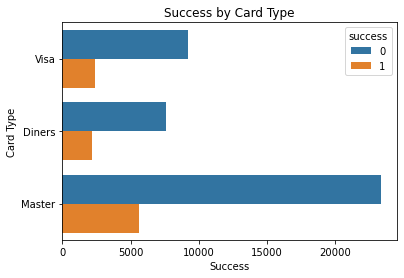

In [197]:
# Relationship between card and success
sns.countplot(hue='success', y='card', data=data)
plt.title('Success by Card Type')
plt.ylabel('Card Type')
plt.xlabel('Success')
plt.show()

- MasterCard shows the highest number of successful transactions by a significant margin, suggesting it is the most reliably successful card type for transactions in the dataset.

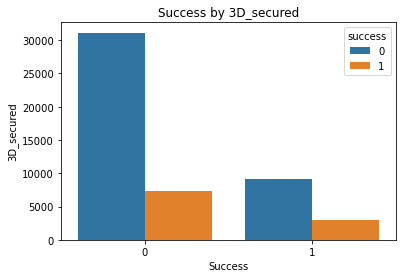

In [198]:
# Relationship between 3D_secured and success
sns.countplot(hue='success', x='3D_secured', data=data)
plt.title('Success by 3D_secured')
plt.ylabel('3D_secured')
plt.xlabel('Success')
plt.show()

- The number of unsuccessful transactions without 3D security (0) is substantially higher than those with 3D security, suggesting that transactions are more likely to fail without the added layer of security.

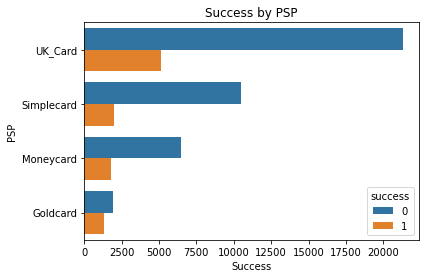

In [199]:
# Relationship between PSP and success
sns.countplot(hue='success', y='PSP', data=data)
plt.title('Success by PSP')
plt.ylabel('PSP')
plt.xlabel('Success')
plt.show()

- UK_Card shows a considerably higher number of successful transactions compared to unsuccessful ones, indicating a high success rate with this provider.
- Moneycard and Goldcard both show relatively low counts of successful transactions, but Goldcard, in particular, has a smaller disparity between its successful and unsuccessful transactions, which could indicate a more balanced performance or lower overall transaction volume.

### Feature Engineering

In [200]:
# Create features that might impact the success rate, such as time of the day, day of the week, transaction fees, etc.

In [201]:
# Transaction Fees
fee_info = {
    'Moneycard': {'success_fee': 5, 'failure_fee': 2},
    'Goldcard': {'success_fee': 10, 'failure_fee': 5},
    'UK_Card': {'success_fee': 3, 'failure_fee': 1},
    'Simplecard': {'success_fee': 1, 'failure_fee': 0.5}
}

In [202]:
# Create a new column 'transaction_fee' based on transaction success or failure
data['transaction_fee'] = np.where(data['success'] == 1, data['PSP'].map(lambda x: fee_info[x]['success_fee']),data['PSP'].map(lambda x: fee_info[x]['failure_fee']))

In [203]:
data.head(20)

,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1.0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3.0
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1.0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3.0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0.5
5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,1.0
6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,0.5
7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,3.0
8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa,0.5
9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,0.5


In [204]:
data.transaction_fee.describe()

count    50410.000000
mean         1.756477
std          1.814051
min          0.500000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: transaction_fee, dtype: float64

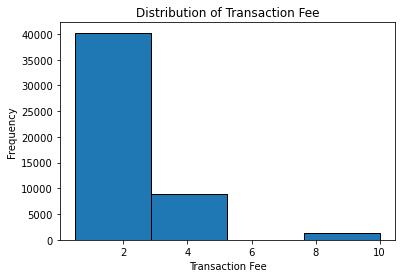

In [205]:
plt.hist(data['transaction_fee'],bins=4,edgecolor='black')
plt.title('Distribution of Transaction Fee')
plt.xlabel('Transaction Fee')
plt.ylabel('Frequency')
plt.show()

- There is a significant decline in frequency from the lowest fee category to the next, suggesting that the most common transaction fee is around the 2 euros.
- The distribution shows very few occurrences of transaction fees beyond the 4-unit fee amount, and it appears that there are almost no transactions with fees above 6 euros, indicating such high fees are rare or exceptional.

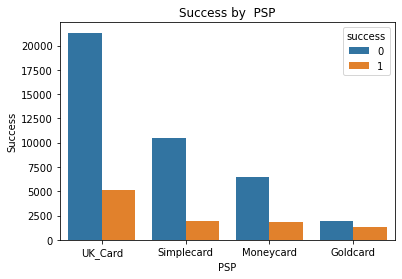

In [206]:
# Relationship between PSP and success
sns.countplot(x='PSP', data=data, hue='success')
plt.title('Success by  PSP')
plt.ylabel('Success')
plt.xlabel('PSP')
plt.show()

- UK_Card has the highest number of successful transactions, vastly outnumbering its unsuccessful ones. This indicates a high success rate for transactions processed through UK_Card.
- Moneycard and Goldcard both show relatively low counts of successful transactions, but Goldcard, in particular, has a smaller disparity between its successful and unsuccessful transactions, which could indicate a more balanced performance or lower overall transaction volume.

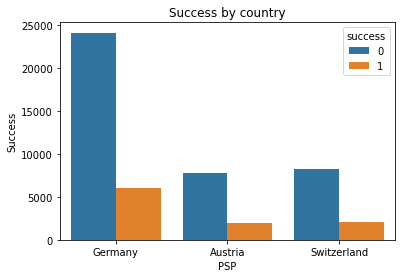

In [207]:
# Relationship between Country and success
sns.countplot(x='country', data=data, hue='success')
plt.title('Success by country')
plt.ylabel('Success')
plt.xlabel('PSP')
plt.show()

- Germany shows a notably high number of successful transactions in comparison to unsuccessful ones, indicating that transactions in Germany are more likely to be successful.

In [208]:
# Calculating the success rate for each PSP
success_rate_per_psp = round(data.groupby('PSP')['success'].mean()*100,2)
success_rate_per_psp

PSP
Goldcard      40.62
Moneycard     21.88
Simplecard    15.81
UK_Card       19.43
Name: success, dtype: float64

In [209]:
# Calculating the card success rate for each PSP
success_rate_per_card = round(data.groupby('card')['success'].mean()*100,2)
success_rate_per_card

card
Diners    22.30
Master    19.39
Visa      20.85
Name: success, dtype: float64

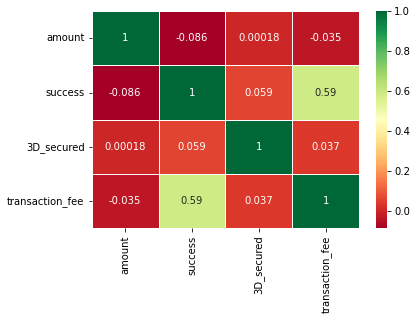

In [210]:
# Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=.5)
plt.show()

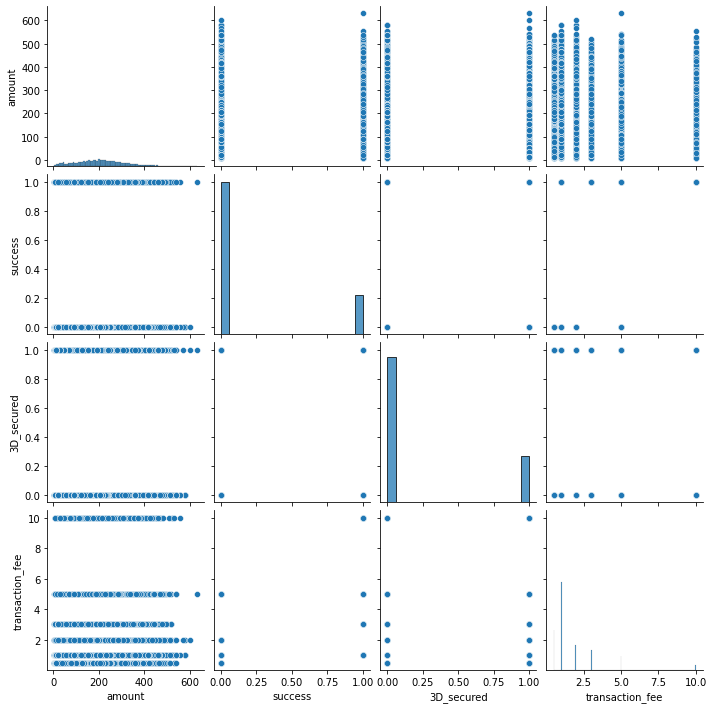

In [211]:
# Relationships between variables using pairplots
sns.pairplot(data)
plt.show()

In [212]:
# Convert 'tmsp' column to datetime format
data['tmsp'] = pd.to_datetime(data['tmsp'])  # Convert 'tmsp' to datetime

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tmsp             50410 non-null  datetime64[ns]
 1   country          50410 non-null  object        
 2   amount           50410 non-null  int64         
 3   success          50410 non-null  int64         
 4   PSP              50410 non-null  object        
 5   3D_secured       50410 non-null  int64         
 6   card             50410 non-null  object        
 7   transaction_fee  50410 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 3.1+ MB


In [214]:
# Adding dayofweek column
# 0 corresponds to Monday, ..., 6 corresponds to Sunday)
data['dayofweek'] = data['tmsp'].dt.dayofweek

In [215]:
# Adding hour of the day column
data['hour'] = data['tmsp'].dt.hour
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee,dayofweek,hour
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1.0,1,0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3.0,1,0
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1.0,1,0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3.0,1,0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0.5,1,0


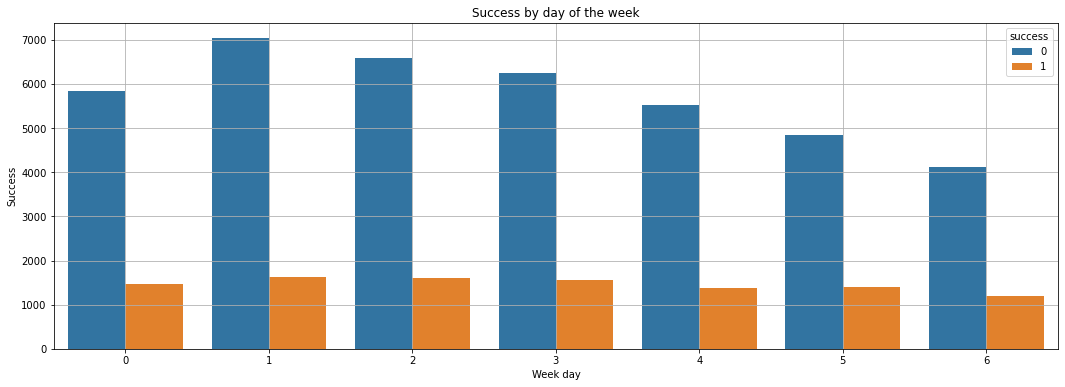

In [216]:
# Relationship between dayofweek and success

plt.figure(figsize=(18, 6))
sns.countplot(x='dayofweek', data=data, hue='success')
plt.title('Success by day of the week')
plt.ylabel('Success')
plt.xlabel('Week day')
plt.grid()
plt.show()

- Throughout the week, unsuccessful transactions consistently outnumber successful ones, with the highest number of unsuccessful transactions occurring on day 1 and the lowest on day 6.
- The number of successful transactions remains relatively constant across the days, with a slight increase on day 2 and the lowest occurrence on day 6.

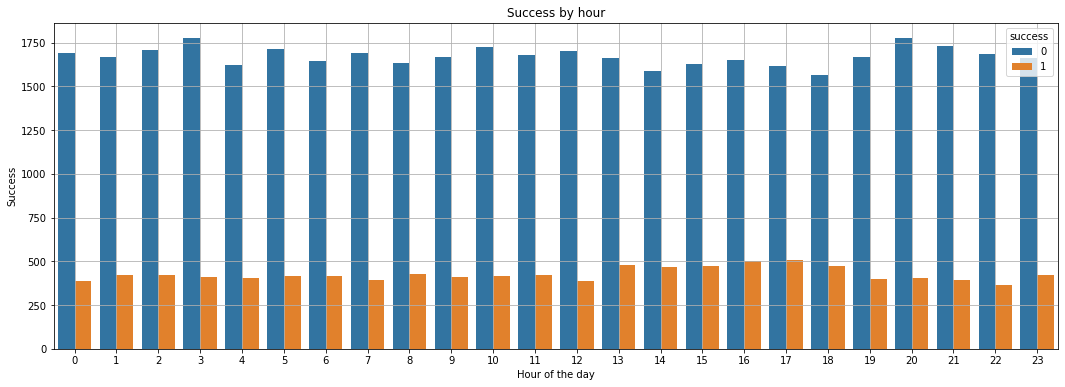

In [217]:
# Relationship between Hour of transaction and success
plt.figure(figsize=(18, 6))
# sns.set(style="whitegrid")

ax = sns.countplot(x='hour', data=data, hue='success')
ax.grid(True)
plt.title('Success by hour')
plt.ylabel('Success')
plt.xlabel('Hour of the day')
plt.show()

- Insuccessful transactions consistently surpass successful ones throughout all hours, with the lowest peaks of failure observed during the late afternoon and evening hours, specifically around 14:00 to 18:00.
- Successful transactions are relatively stable across the day, with slightly higher occurrences late afternoon and evening hours, from 13:00 to 18:00, and lower counts during the day.

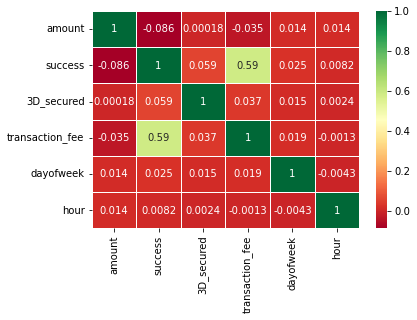

In [221]:
# Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=.5)
plt.show()

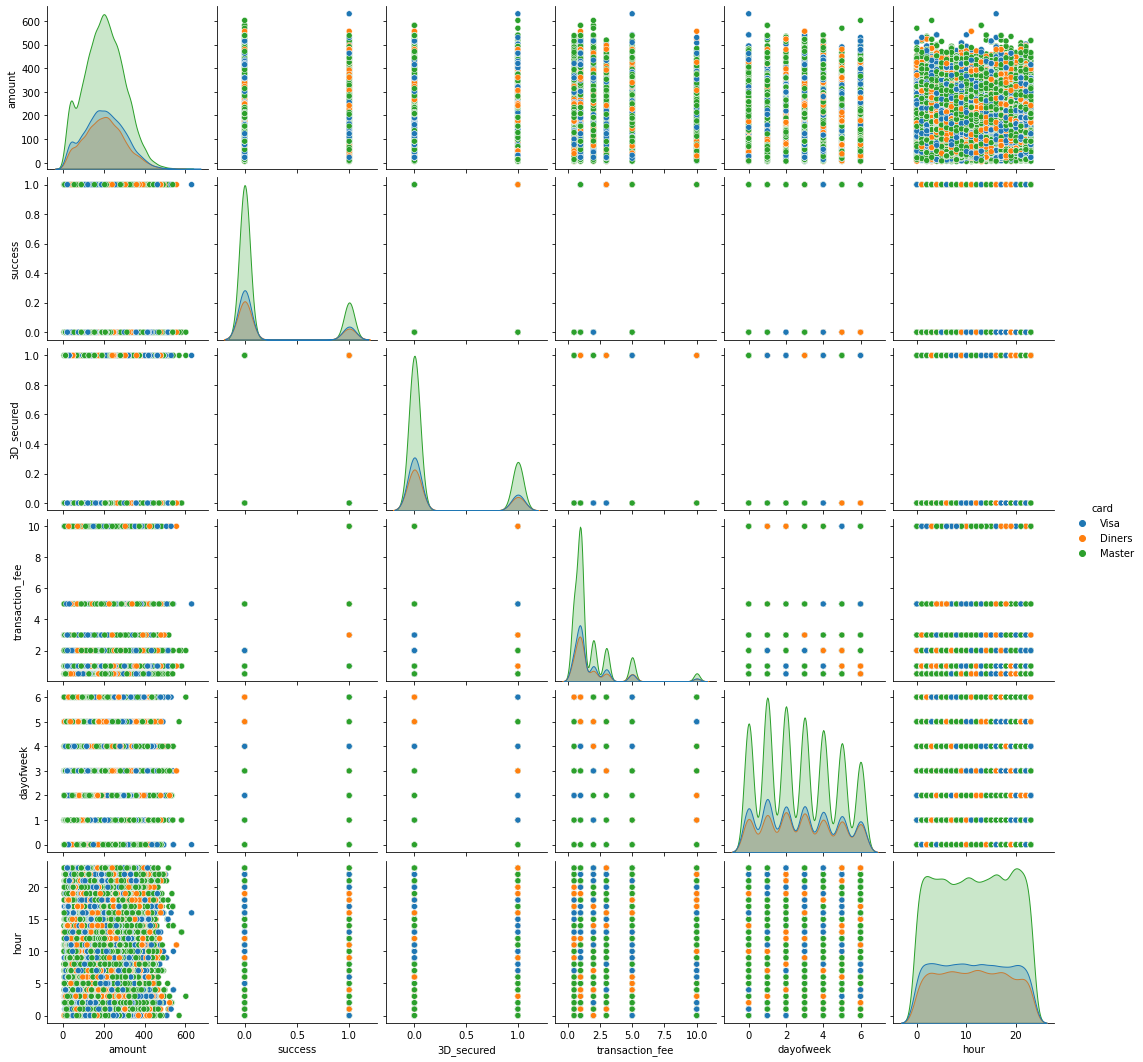

In [218]:
sns.pairplot(data, hue='card')
plt.show()

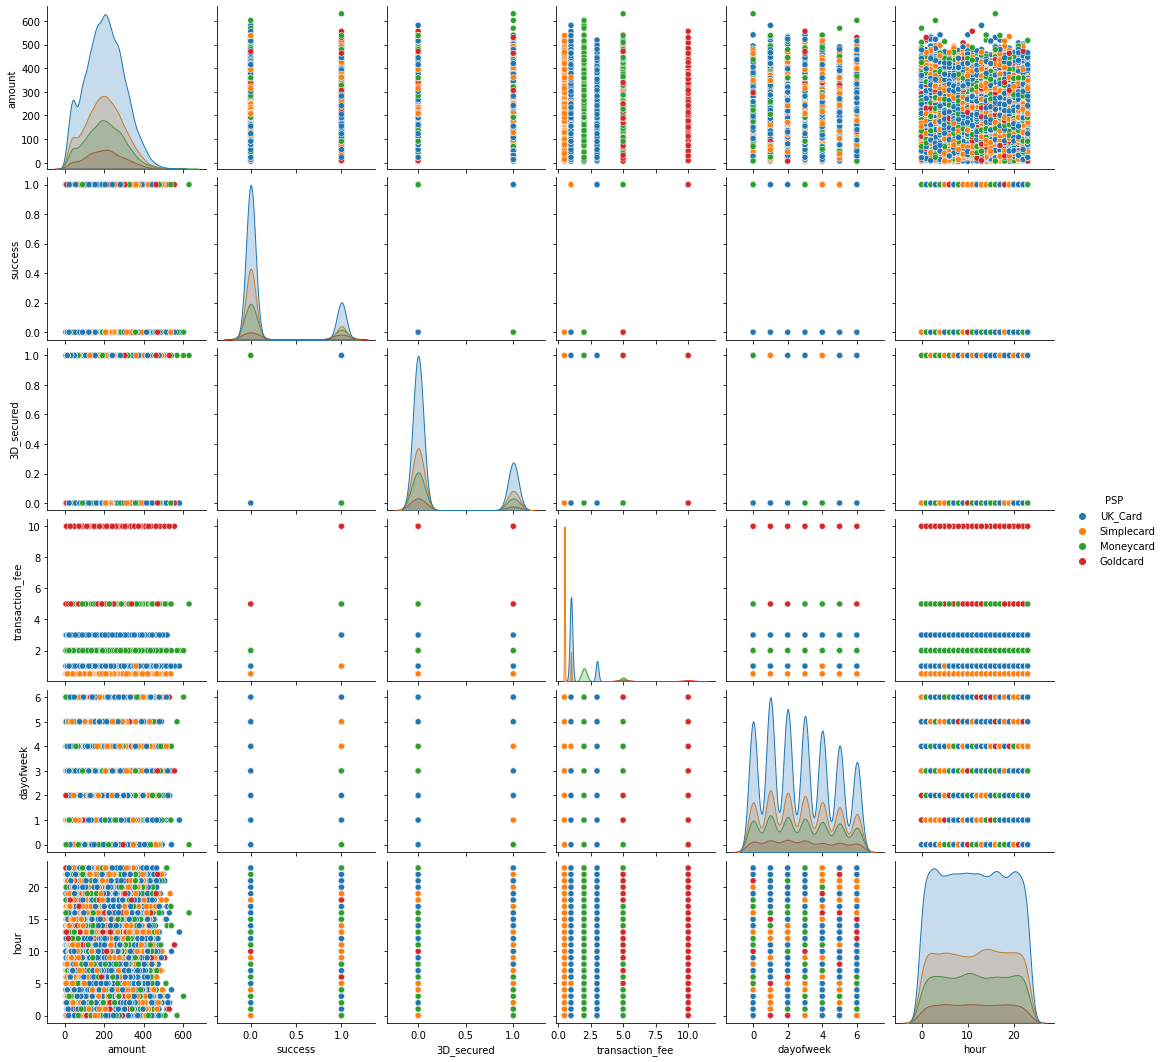

In [219]:
sns.pairplot(data, hue='PSP')
plt.show()

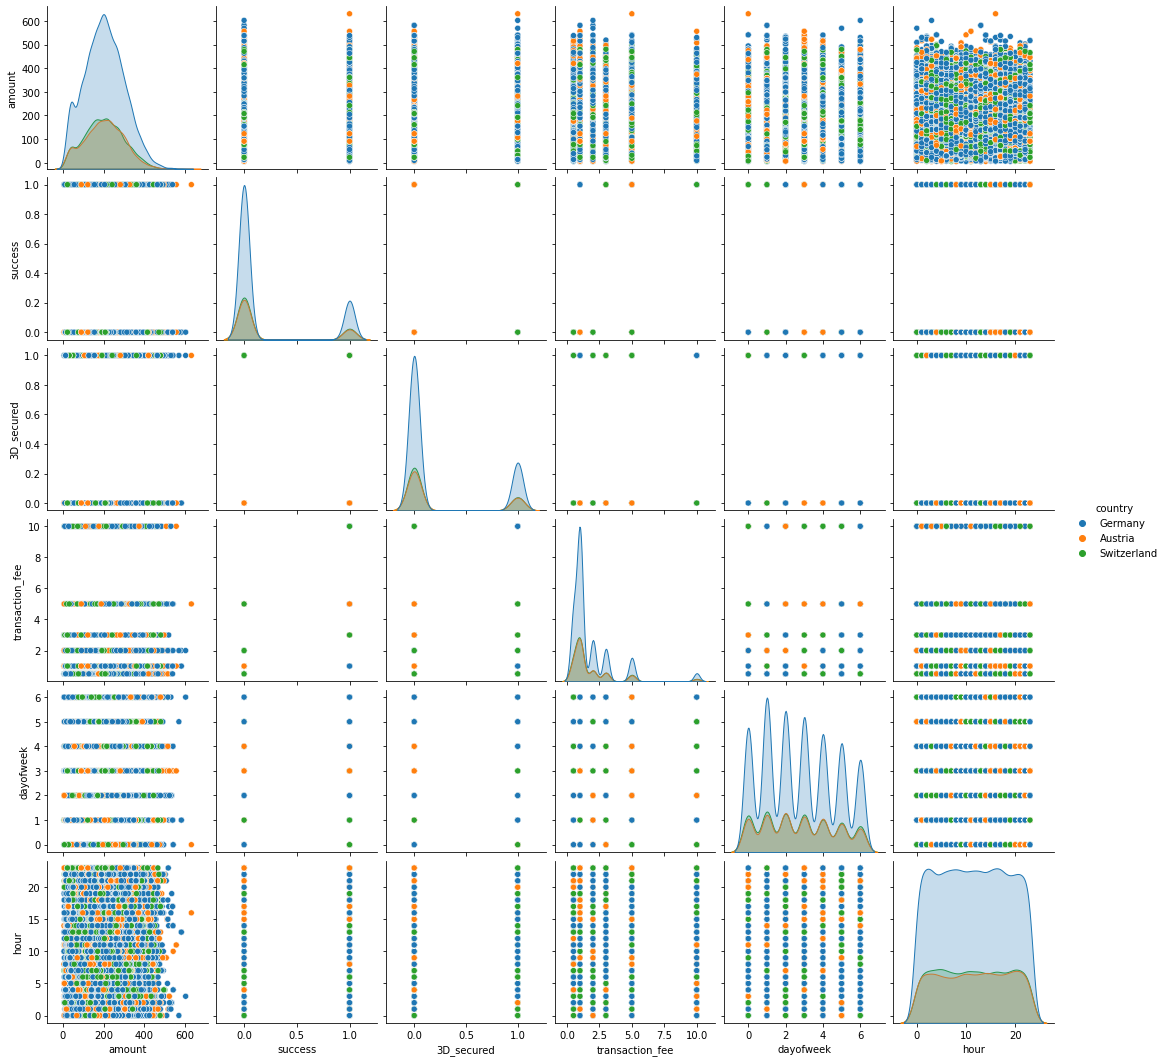

In [220]:
sns.pairplot(data, hue='country')
plt.show()

In [135]:
# Feature Engineering (including handling multiple attempts)
# Identify and count transaction attempts according to transactions are within one minute of each other, 
# with same amount of money and from the same country.

from datetime import timedelta
df = data.sort_values(by='tmsp')

# Identifying transaction attempts
def identify_attempts(df):
    df['attempt'] = 1
    for i in range(1, len(df)):
        if df.iloc[i]['country'] == df.iloc[i-1]['country'] and \
           df.iloc[i]['amount'] == df.iloc[i-1]['amount'] and \
           (df.iloc[i]['tmsp'] - df.iloc[i-1]['tmsp']) <= timedelta(minutes=1):
            df.at[i, 'attempt'] = df.at[i-1, 'attempt'] + 1
    return df

# Apply the function
df = identify_attempts(df)

In [136]:
df.head(20)

,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee,dayofweek,hour,attempt
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1.0,1,0,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3.0,1,0,2
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1.0,1,0,1
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3.0,1,0,2
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0.5,1,0,1
5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master,1.0,1,0,1
6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,0.5,1,0,2
7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,3.0,1,0,1
8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa,0.5,1,0,1
9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,0.5,1,0,2


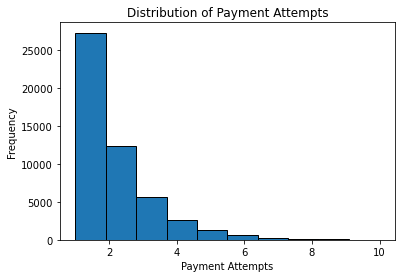

In [137]:
plt.hist(df['attempt'], bins=10, edgecolor='black')
plt.xlabel('Payment Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Attempts')
plt.show()

- The decreasing trend indicates that with each additional payment attempt, the number of transactions needing those attempts drops, suggesting that multiple attempts are less common or that customers may abandon the payment process if the first few attempts fail.

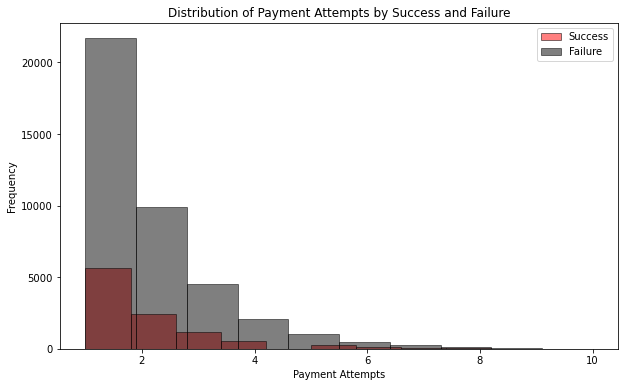

In [138]:
# Creating a histogram to show the distribution of payment attempts, categorized by success and failure
plt.figure(figsize=(10, 6))

# Plotting two histograms for success and failure attempts
plt.hist(df[df['success'] == 1]['attempt'], bins=10, edgecolor='black', alpha=0.5, label='Success', color='red')
plt.hist(df[df['success'] == 0]['attempt'], bins=10, edgecolor='black', alpha=0.5, label='Failure', color='black')

plt.xlabel('Payment Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Attempts by Success and Failure')
plt.legend()
plt.show()

- The overall pattern demonstrates that successful transactions are more likely to occur within the first few attempts, with the need for multiple attempts decreasing progressively, indicating a higher probability of success early in the payment process.

In [139]:
data.shape

(50410, 10)

In [140]:
# Remove the duplicate data
data = data.drop_duplicates() 
print(data.shape)

(50329, 10)


In [141]:
# Preprocess the data
# Identify Categorical, boolean and numeric features for analysis
targetFeature = []
categoricalFeatures = []
booleanFeatures = []
numericalFeatures = []

for col in data.columns:
    if col in ('success'):
        targetFeature.append(col)
    elif data[col].nunique() == 2:  #Features with only 2 unique values as boolean
        booleanFeatures.append(col)
    elif data[col].dtype == 'object':
        categoricalFeatures.append(col)
    elif data[col].dtype in ('int64','float64'):
        numericalFeatures.append(col)
    else:
        numericalFeatures.append(col)

In [142]:
print ('The Target Feature is : {}\n \n '.format(targetFeature))
print ('The Boolean Features are : {}\n  \n'.format(booleanFeatures))
print ('The Categorical Features are : {}\n  \n'.format(categoricalFeatures))
print ('The Numeric Features are : {}\n  \n'.format(numericalFeatures))

The Target Feature is : ['success']
 
 
The Boolean Features are : ['3D_secured']
  

The Categorical Features are : ['country', 'PSP', 'card']
  

The Numeric Features are : ['tmsp', 'amount', 'transaction_fee', 'dayofweek', 'hour']
  



In [143]:
# Dummy variable creation for categorical variables
categoricalFeatures

['country', 'PSP', 'card']

In [144]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy=pd.get_dummies(data[['country', 'PSP', 'card']], drop_first=True)

dummy.head()

,country_Germany,country_Switzerland,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Master,card_Visa
0,1,0,0,0,1,0,1
1,1,0,0,0,1,0,1
2,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0


In [145]:
dummy.shape

(50329, 7)

In [146]:
# Concatenating to the master dataframe
data = pd.concat([data, dummy], axis=1)
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee,dayofweek,hour,country_Germany,country_Switzerland,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Master,card_Visa
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1.0,1,0,1,0,0,0,1,0,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3.0,1,0,1,0,0,0,1,0,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1.0,1,0,1,0,0,0,1,0,0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3.0,1,0,1,0,0,0,1,0,0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0.5,1,0,0,0,0,1,0,0,0


In [147]:
# Dropping the variables as dummies have been created for the below variables, 
data = data.drop(['country', 'PSP', 'card'], axis=1)

In [148]:
data.head()

,tmsp,amount,success,3D_secured,transaction_fee,dayofweek,hour,country_Germany,country_Switzerland,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Master,card_Visa
0,2019-01-01 00:01:11,89,0,0,1.0,1,0,1,0,0,0,1,0,1
1,2019-01-01 00:01:17,89,1,0,3.0,1,0,1,0,0,0,1,0,1
2,2019-01-01 00:02:49,238,0,1,1.0,1,0,1,0,0,0,1,0,0
3,2019-01-01 00:03:13,238,1,1,3.0,1,0,1,0,0,0,1,0,0
4,2019-01-01 00:04:33,124,0,0,0.5,1,0,0,0,0,1,0,0,0


In [149]:
# Finding Correlated values of all variables
corr=data.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Correlation']
corrdf.dropna(subset=['Correlation'],inplace=True)
corrdf['Correlation']=round(corrdf['Correlation'],2)

In [150]:
# Finding Top 10 Positively correlated values

corrdf.sort_values(by='Correlation',ascending=False).head(10)

,Var1,Var2,Correlation
40,transaction_fee,success,0.59
107,PSP_Moneycard,transaction_fee,0.22
27,3D_secured,success,0.06
41,transaction_fee,3D_secured,0.04
105,PSP_Moneycard,success,0.02
53,dayofweek,success,0.02
54,dayofweek,3D_secured,0.02
55,dayofweek,transaction_fee,0.02
94,country_Switzerland,transaction_fee,0.01
152,card_Master,PSP_Simplecard,0.01


In [151]:
# Finding Top 10 Negatively correlated values
corrdf.sort_values(by='Correlation',ascending=True).head(10)

,Var1,Var2,Correlation
167,card_Visa,card_Master,-0.64
97,country_Switzerland,country_Germany,-0.62
139,PSP_UK_Card,PSP_Simplecard,-0.60
138,PSP_UK_Card,PSP_Moneycard,-0.47
120,PSP_Simplecard,transaction_fee,-0.37
125,PSP_Simplecard,PSP_Moneycard,-0.25
133,PSP_UK_Card,transaction_fee,-0.21
13,success,amount,-0.09
118,PSP_Simplecard,success,-0.06
39,transaction_fee,amount,-0.03


### Success Rate Prediction

In [152]:
# Develop classification models to predict the likelihood of a transaction being successful with each PSP.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

In [154]:
data.columns

Index(['tmsp', 'amount', 'success', '3D_secured', 'transaction_fee',
       'dayofweek', 'hour', 'country_Germany', 'country_Switzerland',
       'PSP_Moneycard', 'PSP_Simplecard', 'PSP_UK_Card', 'card_Master',
       'card_Visa'],
      dtype='object')

In [155]:
# Drop unnecessary columns
data = data.drop(['tmsp', 'transaction_fee'], axis=1)

In [156]:
data.head()

,amount,success,3D_secured,dayofweek,hour,country_Germany,country_Switzerland,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Master,card_Visa
0,89,0,0,1,0,1,0,0,0,1,0,1
1,89,1,0,1,0,1,0,0,0,1,0,1
2,238,0,1,1,0,1,0,0,0,1,0,0
3,238,1,1,1,0,1,0,0,0,1,0,0
4,124,0,0,1,0,0,0,0,1,0,0,0


In [157]:
data.shape

(50329, 12)

In [158]:
# Selecting features and target variable 
y = data['success']
X = data.drop("success",axis=1)

In [159]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [160]:
X_train.shape

(35230, 11)

In [161]:
X_test.shape

(15099, 11)

In [162]:
# Data Preprocessing

numericalFeatures=['amount', 'dayofweek', 'hour'] 
scaler = StandardScaler() 
X_train[numericalFeatures] = scaler.fit_transform(X_train[numericalFeatures]) 
X_test[numericalFeatures] = scaler.transform(X_test[numericalFeatures])

### Baseline model

In [222]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [164]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LGBM Classifier": LGBMClassifier()
}

Random Forest Metrics:
Confusion Matrix:
[[10942  1064]
 [ 2703   390]]
AUC ROC: 0.6078617389225422
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     12006
           1       0.27      0.13      0.17      3093

    accuracy                           0.75     15099
   macro avg       0.54      0.52      0.51     15099
weighted avg       0.69      0.75      0.71     15099


 
 
 
K-Nearest Neighbors Metrics:
Confusion Matrix:
[[11158   848]
 [ 2730   363]]
AUC ROC: 0.5668165486175976
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12006
           1       0.30      0.12      0.17      3093

    accuracy                           0.76     15099
   macro avg       0.55      0.52      0.52     15099
weighted avg       0.70      0.76      0.72     15099


 
 
 
Logistic Regression Metrics:
Confusion Matrix:
[[11940    66]
 [ 3046    47]]
AU

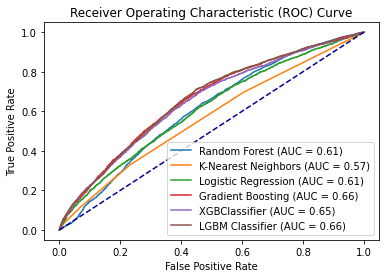

In [165]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    roc_auc_score, 
    classification_report, 
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    # Dictionary to hold the scores and reports
    model_scores = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate probabilities for AUC
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Calculate metrics
        conf_matrix = confusion_matrix(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
        
        # Store metrics
        model_scores[name] = {
            'Confusion Matrix': conf_matrix,
            'AUC ROC': auc_roc,
            'Classification Report': classification_report(y_test, y_pred)
        }

        # Print metrics
        print(f"{name} Metrics:")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"AUC ROC: {auc_roc}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        print("\n \n \n ")
        
        # Plot ROC Curve if possible
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.plot(fpr, tpr, linestyle='-', label=f'{name} (AUC = {auc_roc:.2f})')
    
    # Show the ROC Curve
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    return model_scores

# Train and evaluate models
model_scores = train_and_evaluate(models, X_train, X_test, y_train, y_test)


### Model tuning

In [103]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'num_leaves': [10, 30, 50, 70], 
    'max_depth': [10, 20, 50],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 0.9, 1],
}

# Initialize the LGBM Classifier
lgbm = LGBMClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Score: {best_score}")

# Train a new model with the best parameters found
best_lgbm = LGBMClassifier(**best_parameters)
best_lgbm.fit(X_train, y_train)

# Evaluate the model using the test set
y_pred = best_lgbm.predict(X_test)
y_proba = best_lgbm.predict_proba(X_test)[:, 1]  # if you want to evaluate AUC ROC


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 30, 'subsample': 0.8}
Best Score: 0.6694079836279128


In [108]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Tuned LGBM Classifier Metrics:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC of the tuned model: {roc_auc}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Tuned LGBM Classifier Metrics:
Confusion Matrix:
[[8977    0]
 [3076    2]]
ROC AUC of the tuned model: 0.6708985485468858
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      8977
           1       1.00      0.00      0.00      3078

    accuracy                           0.74     12055
   macro avg       0.87      0.50      0.43     12055
weighted avg       0.81      0.74      0.64     12055



In [105]:
def auc_roc_curve(model, X_test, y_test):

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

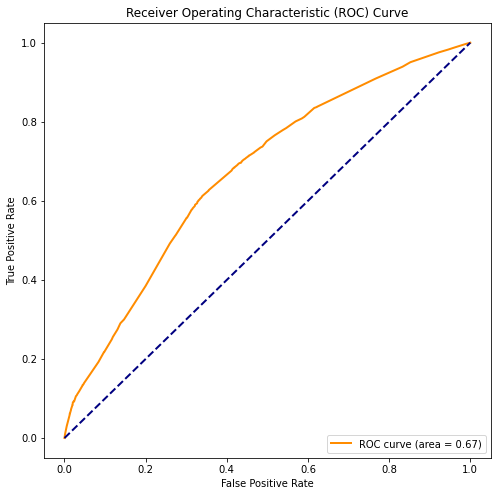

In [106]:
# AUC-ROC curve 
auc_roc_curve(best_lgbm, X_test, y_test)

In [95]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

### Importance of the individual features

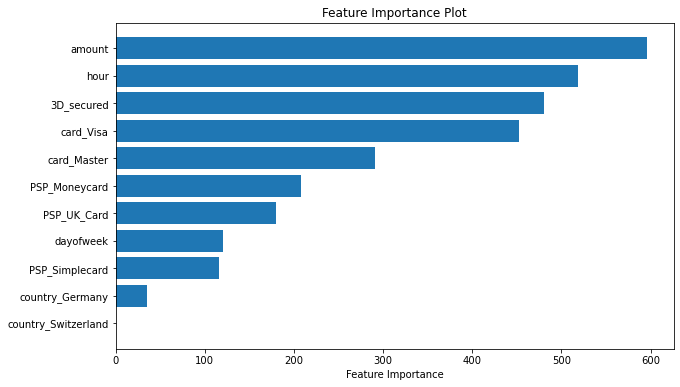

In [96]:
# Get feature importances from the model
# Models like Random Forest and Gradient Boosting supports the .feature_importances_ attribute
feature_importances = best_model.feature_importances_

# Sort indices based on importance
indices = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

### Fee Optimization with combined metrics

In [ ]:
# Developing a combined metric or scoring system that considers both the success rate and the fee. 

In [ ]:
# Transaction fee information for each PSP
fee_info = {
    'Moneycard': {'success_fee': 5, 'failure_fee': 2},
    'Goldcard': {'success_fee': 10, 'failure_fee': 5},
    'UK_Card': {'success_fee': 3, 'failure_fee': 1},
    'Simplecard': {'success_fee': 1, 'failure_fee': 0.5}
}

# Success rate for each PSP (in percentages)
success_rate_info = {
    'Goldcard': 40.62,
    'Moneycard': 21.88,
    'Simplecard': 15.81,
    'UK_Card': 19.43
}

# Calculate the combined weight for each PSP
# weights are calculated by considering the success rate and the expected fee for each PSP
combined_weights = {}
for psp, fees in fee_info.items():
    success_rate = success_rate_info.get(psp, 0) / 100  # Convert percentage to decimal
    expected_fee = fees['success_fee'] * success_rate + fees['failure_fee'] * (1 - success_rate)
    combined_weight = success_rate - expected_fee  # Assuming equal weights for success rate and fee
    combined_weights[psp] = combined_weight

combined_weights

A higher (less negative) weight indicates a more favorable balance of success rate against transaction fees.
In this case, all the weights are negative, suggesting that the fees have a substantial impact relative to the success rates. 


The PSP with the least negative weight is the most balanced in terms of high success rate and low fees, which is 'Simplecard' in this scenario. 

In [223]:
pwd

'C:\\Users\\manas\\Python\\Model Engineering'